# DSCI 503 - Project 02
### Symphony Hopkins

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
For this section, we will create a function that will simulate the stock market by randomly generating daily stock prices.

In [2]:
def simulate_stock(start, rate, vol, days):
    
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days)

    cumulative_yields = np.cumsum(daily_yields)
    
    daily_multipliers = np.exp(cumulative_yields)

    daily_prices = start * daily_multipliers

    daily_prices = np.concatenate(([start], daily_prices))

    return np.round(daily_prices,2)
    

Now, we will test the function.

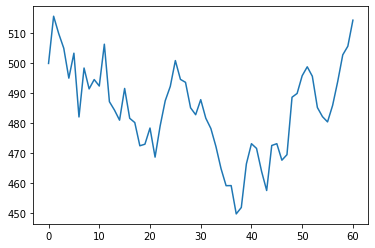

In [3]:
np.random.seed(1)
stock_simulator_test = simulate_stock(500, 0.08, 0.3, 60)
plt.plot(stock_simulator_test)
plt.show()

## Part B: Annual Yield Function
We will create a function that uses the results from the stock simulation function to calculate the annual yield.

In [4]:
def find_yield(run):
    annual_yield = (math.log(run[-1]/run[0])) * (252 / (len(run) - 1))
    return round(annual_yield, 4)

We are going to test the function by running it on the previously simtulated run.

In [5]:
find_yield(stock_simulator_test)

0.1196

We will now explore the potential variability in our simulated runs by creating and plotting 25 simulated runs.

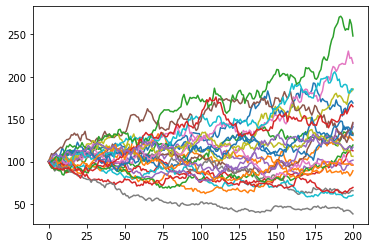

In [6]:
yield_results = []

for index in range(25):
    sim = simulate_stock(100, 0.06, 0.4, 200)
    yield_results.append(find_yield(sim))
    plt.plot(sim)
    
plt.show()

We will now display the yield results for the 25 simulated runs.

In [7]:
print(yield_results)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
We will now experiment with random seed values to see how they effect the stock simulations. 

In the cell below, Stock A has the highest simulated final price.

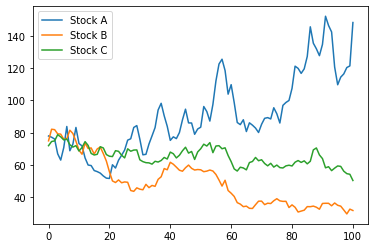

In [8]:
np.random.seed(57)

stock_a = simulate_stock(78, 0.04, 1.2, 100)
stock_b = simulate_stock(75, 0.08, 0.8, 100)
stock_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a, label='Stock A')
plt.plot(stock_b, label='Stock B')
plt.plot(stock_c, label='Stock C')
plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated final price.

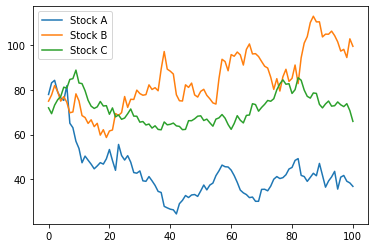

In [9]:
np.random.seed(70)

stock_a = simulate_stock(78, 0.04, 1.2, 100)
stock_b = simulate_stock(75, 0.08, 0.8, 100)
stock_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a, label='Stock A')
plt.plot(stock_b, label='Stock B')
plt.plot(stock_c, label='Stock C')
plt.legend()
plt.show()


In the cell below, Stock C has the highest simulated final price.

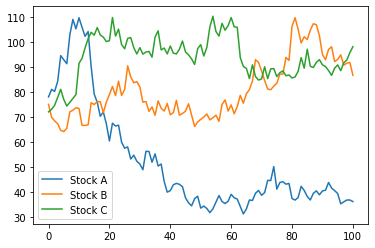

In [10]:
np.random.seed(42)

stock_a = simulate_stock(78, 0.04, 1.2, 100)
stock_b = simulate_stock(75, 0.08, 0.8, 100)
stock_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a, label='Stock A')
plt.plot(stock_b, label='Stock B')
plt.plot(stock_c, label='Stock C')
plt.legend()
plt.show()

## Part D: Monte Carlo Simulation
We will create a Monte Carlo Simulation function to see the possible stock simulations that can occur using the same parameters. By doing this, we can estimate the probability of a certain event occurring.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    
    final_prices = []
    annual_yields = []
    
    for index in range(num_runs):
        
        run = simulate_stock(start, rate, vol, days)
        
        final_prices.append(run[-1])
        
        a_yield = find_yield(run)
        
        annual_yields.append(a_yield)
        
    final_prices = np.asarray(final_prices)
    annual_yields = np.asarray(annual_yields)
    
    return final_prices, annual_yields

We are going to test the Monte Carlo simulation function with a random seed value of 1.

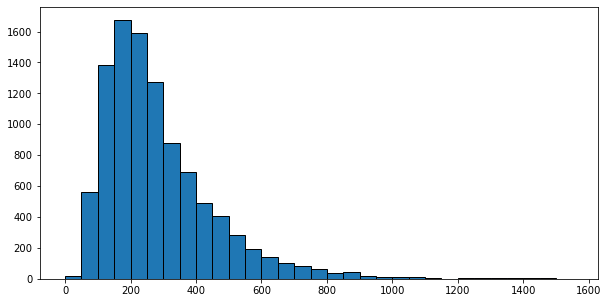

In [12]:
np.random.seed(1)
mc_results = monte_carlo(200, 0.1, 0.4, 500, 10000)

plt.figure(figsize=[10,5])
plt.hist(mc_results[0], edgecolor='black',  bins = np.arange(0, 1600, 50))
plt.show()

We are going to display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
per_10 = np.percentile(mc_results[0], 10)
per_25 = np.percentile(mc_results[0], 25)
per_50 = np.percentile(mc_results[0], 50)
per_75 = np.percentile(mc_results[0], 75)
per_90 = np.percentile(mc_results[0], 90)

print(f'''
10th percentile: {round(per_10, 2)}
25th percentile: {round(per_25, 2)}
50th percentile: {round(per_50, 2)}
75th percentile: {round(per_75, 2)}
90th percentile: {round(per_90, 2)}
''')


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91



## Part E: Effects of Votalitly
We are going to use the Monte Carlo simulations to see how different volatilities affect the simulated stock prices.

In [14]:
np.random.seed(1)

stock_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
stock_B = monte_carlo(100, 0.12, 0.7, 150, 10000)

avg_ay_A = round(np.average(stock_A[1]), 4)
avg_ay_B = round(np.average(stock_B[1]), 4)

print(f'''
Average Annual Yield for A over 10000 runs: {avg_ay_A}
Average Annual Yield for B over 10000 runs: {avg_ay_B}
''')


Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128



We will visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final results.

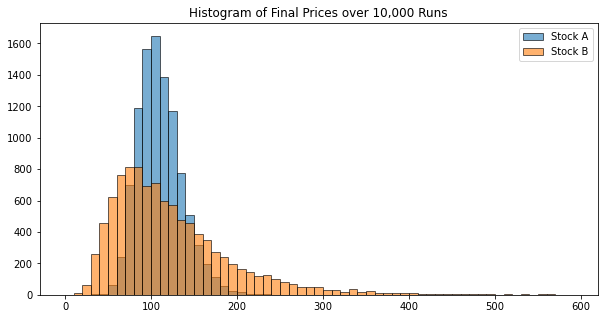

In [15]:
plt.figure(figsize=[10,5])
plt.hist(stock_A[0], edgecolor ='black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'Stock A')
plt.title('Histogram of Final Prices over 10,000 Runs')

plt.hist(stock_B[0], edgecolor ='black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')

plt.legend()
plt.show()

## Part F: Comparing Two Stocks
We will compare two Monte Carlo simulations using different paramters to compare their performances.

In [16]:
np.random.seed(1)

Stock_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
Stock_B = monte_carlo(120, 0.05, 0.5, 252, 10000)

A_ends_above_B = round((np.sum(Stock_A[0] > Stock_B[0])) / len(Stock_A[0]), 4)
A_ends_above_150 = round((np.sum(Stock_A[0] > 150)) / len(Stock_A[0]), 4)
B_ends_above_150 = round((np.sum(Stock_B[0] > 150)) / len(Stock_A[0]), 4)
A_ends_below_100 = round((np.sum(Stock_A[0] < 100)) / len(Stock_A[0]), 4)
B_ends_below_100 = round((np.sum(Stock_B[0] < 100)) / len(Stock_A[0]), 4)

print(f'''

Proportions of runs in which...
-------------------------------
A ends above B:   {A_ends_above_B}
A ends above 150: {A_ends_above_150}
B ends above 150: {B_ends_above_150}
A ends below 100: {A_ends_below_100}
B ends below 100: {B_ends_below_100}

''')
                         



Proportions of runs in which...
-------------------------------
A ends above B:   0.5206
A ends above 150: 0.2338
B ends above 150: 0.3619
A ends below 100: 0.095
B ends below 100: 0.3195




## Part G: Expected Call Payoff
We will calculate the expected call payoff on a stock by using the Monte Carlo simulation function.

In [17]:
np.random.seed(1)
stock_c = monte_carlo(200, 0.11, 0.4, 252, 10000)
payoff = stock_c[0] - 225
payoff = np.where(payoff < 0, 0, payoff)
avg_payoff = np.mean(payoff)
print(avg_payoff)

45.898432
